In [47]:
df = pd.read_csv('../data/properties_main.csv')


In [48]:
df['latest_price'] = (
    df['latest_price']
    .astype(str)
    .str.replace('£', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', None)
    .astype(float)
)

df['latest_date'] = pd.to_datetime(df['latest_date'], errors='coerce')
df['year'] = df['latest_date'].dt.year
df['month'] = df['latest_date'].dt.month

df['property_type'] = df['property_type'].fillna('Unknown')
df['property_subtype'] = df['property_subtype'].fillna('Unknown')
df['tenure'] = df['tenure'].fillna('Unknown')
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())


In [49]:
import re

df['postcode'] = df['address'].str.extract(r'([A-Z]{1,2}\d{1,2}[A-Z]?\s?\d[A-Z]{2})')
df['postcode_area'] = df['postcode'].str.split().str[0]


In [50]:
df[['address', 'postcode', 'postcode_area']].head()


,address,postcode,postcode_area
0,"16, Waddon Close, Croydon, Greater London CR0 4JT",CR0 4JT,CR0
1,"46, Ruthrieston Court, Riverside Drive, Aberde...",AB10 7QF,AB10
2,"18, Newbridge Road, Small Heath, Birmingham, W...",B9 5JG,B9
3,"Chepstow House, 16 - 20, Flat 20, Chepstow Str...",M1 5JF,M1
4,"15, Apartment 23, Wolstenholme Square, Liverpo...",L1 4JL,L1


In [51]:
df = df.drop(['property_id', 'latest_date', 'property_subtype', 'postcode', 'address'], axis=1)


In [52]:
df = pd.get_dummies(df, columns=['property_type', 'tenure', 'postcode_area'], drop_first=True)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop('latest_price', axis=1)
y = df['latest_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

rf_score, rf_rmse


(0.2167437000743051, np.float64(1345409.743642115))

In [61]:
df = pd.read_csv('../data/properties_main.csv')
df.columns



Index(['property_id', 'address', 'property_type', 'property_subtype',
       'bedrooms', 'bathrooms', 'tenure', 'latest_price', 'latest_date',
       'new_build'],
      dtype='object')

In [1]:
import pandas as pd

df = pd.read_csv('../data/properties_main.csv')

df.head()


,property_id,address,property_type,property_subtype,bedrooms,bathrooms,tenure,latest_price,latest_date,new_build
0,1453621|16|,"16, Waddon Close, Croydon, Greater London CR0 4JT",Terraced,NaN,5.0,NaN,Freehold,"£540,000",2024-02-28,False
1,1288910||46,"46, Ruthrieston Court, Riverside Drive, Aberde...",NaN,NaN,NaN,NaN,NaN,"£160,000",2023-03-02,False
2,34264|18|,"18, Newbridge Road, Small Heath, Birmingham, W...",Terraced,NaN,3.0,1.0,Leasehold,"£200,000",2015-12-10,False
3,"1138715|CHEPSTOW HOUSE, 16 - 20|FLAT 20","Chepstow House, 16 - 20, Flat 20, Chepstow Str...",Flat,NaN,NaN,NaN,Leasehold,"£280,000",2021-07-09,False
4,4708224|15|APARTMENT 23,"15, Apartment 23, Wolstenholme Square, Liverpo...",Flat,NaN,NaN,NaN,Leasehold,"£109,995",2019-11-11,True


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22258 entries, 0 to 22257
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_id       22258 non-null  object 
 1   address           22258 non-null  object 
 2   property_type     21258 non-null  object 
 3   property_subtype  0 non-null      float64
 4   bedrooms          9828 non-null   float64
 5   bathrooms         8439 non-null   float64
 6   tenure            21258 non-null  object 
 7   latest_price      22258 non-null  object 
 8   latest_date       22258 non-null  object 
 9   new_build         22258 non-null  bool   
dtypes: bool(1), float64(3), object(6)
memory usage: 1.5+ MB


In [3]:
df.describe()

,property_subtype,bedrooms,bathrooms
count,0.0,9828.000000,8439.000000
mean,NaN,2.680505,1.428250
std,NaN,1.106186,0.714717
min,NaN,1.000000,1.000000
25%,NaN,2.000000,1.000000
50%,NaN,3.000000,1.000000
75%,NaN,3.000000,2.000000
max,NaN,18.000000,11.000000


In [4]:
df.columns

Index(['property_id', 'address', 'property_type', 'property_subtype',
       'bedrooms', 'bathrooms', 'tenure', 'latest_price', 'latest_date',
       'new_build'],
      dtype='object')

In [10]:
df.isnull().sum()

property_id             0
address                 0
property_type        1000
property_subtype    22258
bedrooms            12430
bathrooms           13819
tenure               1000
latest_price            0
latest_date             0
new_build               0
year                    0
month                   0
dtype: int64

In [8]:
df['property_type'].unique()
df['property_subtype'].unique()
df['tenure'].unique()
df['new_build'].unique()



array([False,  True])

In [12]:
df['latest_date'] = pd.to_datetime(df['latest_date'], errors='coerce')
df['year'] = df['latest_date'].dt.year
df['month'] = df['latest_date'].dt.month


In [13]:
df['latest_date'].head(20)

0    2024-02-28
1    2023-03-02
2    2015-12-10
3    2021-07-09
4    2019-11-11
5    2022-09-12
6    2022-06-07
7    2023-04-03
8    2023-10-27
9    2022-03-18
10   2023-07-26
11   2020-11-27
12   2022-03-11
13   2023-04-05
14   2022-09-08
15   2023-11-21
16   2020-09-03
17   2020-09-04
18   2020-09-04
19   2020-09-10
Name: latest_date, dtype: datetime64[ns]

In [14]:
df[['latest_date', 'year', 'month']].head()


,latest_date,year,month
0,2024-02-28,2024,2
1,2023-03-02,2023,3
2,2015-12-10,2015,12
3,2021-07-09,2021,7
4,2019-11-11,2019,11


In [15]:
df = df.drop(['property_id', 'address', 'latest_date'], axis=1)
df.head()


,property_type,property_subtype,bedrooms,bathrooms,tenure,latest_price,new_build,year,month
0,Terraced,NaN,5.0,NaN,Freehold,"£540,000",False,2024,2
1,NaN,NaN,NaN,NaN,NaN,"£160,000",False,2023,3
2,Terraced,NaN,3.0,1.0,Leasehold,"£200,000",False,2015,12
3,Flat,NaN,NaN,NaN,Leasehold,"£280,000",False,2021,7
4,Flat,NaN,NaN,NaN,Leasehold,"£109,995",True,2019,11


In [16]:
df.isnull().sum()


property_type        1000
property_subtype    22258
bedrooms            12430
bathrooms           13819
tenure               1000
latest_price            0
new_build               0
year                    0
month                   0
dtype: int64

In [17]:
df['property_type'].unique()
df['property_subtype'].unique()
df['tenure'].unique()
df['new_build'].unique()


array([False,  True])

In [18]:
df['property_type'] = df['property_type'].fillna('Unknown')
df['property_subtype'] = df['property_subtype'].fillna('Unknown')
df['tenure'] = df['tenure'].fillna('Unknown')


In [19]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())


In [20]:
df['property_type'].unique()

array(['Terraced', 'Unknown', 'Flat', 'Semi-detached', 'Detached'],
      dtype=object)

In [21]:
df['property_subtype'].unique()

array(['Unknown'], dtype=object)

In [22]:
df['tenure'].unique()

array(['Freehold', 'Unknown', 'Leasehold'], dtype=object)

In [23]:
df = df.drop(['property_subtype'], axis=1)

df['property_type'] = df['property_type'].fillna('Unknown')
df['tenure'] = df['tenure'].fillna('Unknown')

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [24]:
df.isnull().sum()

property_type    0
bedrooms         0
bathrooms        0
tenure           0
latest_price     0
new_build        0
year             0
month            0
dtype: int64

In [25]:
df = pd.get_dummies(df, columns=['property_type', 'tenure'], drop_first=True)


In [26]:
df.head()

,bedrooms,bathrooms,latest_price,new_build,year,month,property_type_Flat,property_type_Semi-detached,property_type_Terraced,property_type_Unknown,tenure_Leasehold,tenure_Unknown
0,5.0,1.0,"£540,000",False,2024,2,False,False,True,False,False,False
1,3.0,1.0,"£160,000",False,2023,3,False,False,False,True,False,True
2,3.0,1.0,"£200,000",False,2015,12,False,False,True,False,True,False
3,3.0,1.0,"£280,000",False,2021,7,True,False,False,False,True,False
4,3.0,1.0,"£109,995",True,2019,11,True,False,False,False,True,False


In [27]:
X = df.drop('latest_price', axis=1)
y = df['latest_price']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
df['latest_price'].head(20)


0       £540,000
1       £160,000
2       £200,000
3       £280,000
4       £109,995
5       £310,500
6     £2,600,000
7     £8,750,000
8     £1,830,000
9     £1,540,000
10      £933,625
11    £1,830,000
12    £1,365,000
13      £328,750
14      £260,000
15      £525,000
16      £562,500
17    £1,250,000
18      £257,500
19      £292,500
Name: latest_price, dtype: object

In [33]:
df['latest_price'] = (
    df['latest_price']
    .str.replace('£', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)


In [34]:
df['latest_price'].dtype


dtype('float64')

In [35]:
X = df.drop('latest_price', axis=1)
y = df['latest_price']


In [37]:
df['latest_price'] = (
    df['latest_price']
    .astype(str)
    .str.replace('£', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', None)
)

df['latest_price'] = df['latest_price'].astype(float)



In [39]:
df['latest_price'].head(10)


0     540000.0
1     160000.0
2     200000.0
3     280000.0
4     109995.0
5     310500.0
6    2600000.0
7    8750000.0
8    1830000.0
9    1540000.0
Name: latest_price, dtype: float64

In [40]:
df['latest_price'].head(10)
df['latest_price'].dtype



dtype('float64')

In [41]:
X = df.drop('latest_price', axis=1)
y = df['latest_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
lr_score = lr.score(X_test, y_test)
lr_score


0.05815406297230741

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


np.float64(1475341.4852425402)

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
rf_score


0.06825998101146147

In [46]:
y_pred_rf = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_rmse


np.float64(1467405.0009261805)

In [62]:
df = pd.read_csv('../data/properties_main.csv')


In [63]:
df.columns


Index(['property_id', 'address', 'property_type', 'property_subtype',
       'bedrooms', 'bathrooms', 'tenure', 'latest_price', 'latest_date',
       'new_build'],
      dtype='object')

In [64]:
import re

postcode_pattern = r'[A-Z]{1,2}[0-9][0-9A-Z]?\s?[0-9][A-Z]{2}'

df['postcode'] = df['address'].astype(str).apply(
    lambda x: re.search(postcode_pattern, x).group(0) if re.search(postcode_pattern, x) else None
)


In [65]:
df[['address', 'postcode']].head(20)


,address,postcode
0,"16, Waddon Close, Croydon, Greater London CR0 4JT",CR0 4JT
1,"46, Ruthrieston Court, Riverside Drive, Aberde...",AB10 7QF
2,"18, Newbridge Road, Small Heath, Birmingham, W...",B9 5JG
3,"Chepstow House, 16 - 20, Flat 20, Chepstow Str...",M1 5JF
4,"15, Apartment 23, Wolstenholme Square, Liverpo...",L1 4JL
5,"40, Summercourt Road, London, Greater London E...",E1 0SQ
6,"25, Apartment 203, Nutford Place, London, Grea...",W1H 5YQ
7,"6, Apartment 1.11, Horse Guards Avenue, London...",SW1A 2BH
8,"6, Bevan Street, London, Greater London N1 7DY",N1 7DY
9,"Clarence Gate Gardens, Flat 176, Glentworth St...",NW1 6AR


In [66]:
df['postcode_area'] = df['postcode'].str.split().str[0]


In [67]:
df[['postcode', 'postcode_area']].head()


,postcode,postcode_area
0,CR0 4JT,CR0
1,AB10 7QF,AB10
2,B9 5JG,B9
3,M1 5JF,M1
4,L1 4JL,L1


In [68]:
df['latest_price'] = (
    df['latest_price']
    .astype(str)
    .str.replace('£', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .replace('', None)
    .astype(float)
)

df['latest_date'] = pd.to_datetime(df['latest_date'], errors='coerce')
df['year'] = df['latest_date'].dt.year
df['month'] = df['latest_date'].dt.month

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['property_type'] = df['property_type'].fillna('Unknown')
df['tenure'] = df['tenure'].fillna('Unknown')

df = df.drop(['property_id', 'latest_date', 'property_subtype', 'address', 'postcode'], axis=1)


In [69]:
df = pd.get_dummies(df, columns=['property_type', 'tenure', 'postcode_area'], drop_first=True)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df.drop('latest_price', axis=1)
y = df['latest_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

rf_score, rf_rmse


(0.2167437000743051, np.float64(1345409.743642115))

In [73]:

df.columns


Index(['bedrooms', 'bathrooms', 'latest_price', 'new_build', 'year', 'month',
       'property_type_Flat', 'property_type_Semi-detached',
       'property_type_Terraced', 'property_type_Unknown', 'tenure_Leasehold',
       'tenure_Unknown', 'postcode_area_B9', 'postcode_area_BN1',
       'postcode_area_BR1', 'postcode_area_CR0', 'postcode_area_CT1',
       'postcode_area_DA1', 'postcode_area_E1', 'postcode_area_EC1A',
       'postcode_area_EC1M', 'postcode_area_EC1N', 'postcode_area_EC1R',
       'postcode_area_EC1V', 'postcode_area_EC1Y', 'postcode_area_EC2A',
       'postcode_area_EC4A', 'postcode_area_EN1', 'postcode_area_GU1',
       'postcode_area_HA1', 'postcode_area_IG1', 'postcode_area_KT1',
       'postcode_area_L1', 'postcode_area_M1', 'postcode_area_ME1',
       'postcode_area_N1', 'postcode_area_NW1', 'postcode_area_RG1',
       'postcode_area_RH1', 'postcode_area_RM1', 'postcode_area_SE1',
       'postcode_area_SL1', 'postcode_area_SM1', 'postcode_area_SN1',
       'postco

In [74]:
df['latest_price'].describe()


count    2.225800e+04
mean     7.037323e+05
std      1.337293e+06
min      1.200000e+04
25%      2.600000e+05
50%      4.300000e+05
75%      7.000000e+05
max      5.612784e+07
Name: latest_price, dtype: float64

Matplotlib is building the font cache; this may take a moment.


<Axes: >

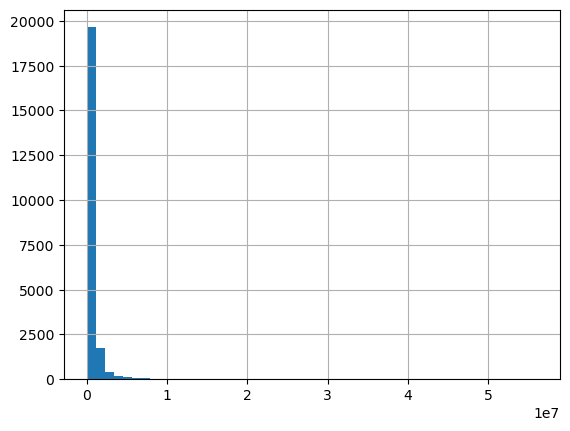

In [75]:
df['latest_price'].hist(bins=50)


In [76]:
upper_limit = df['latest_price'].quantile(0.99)
df = df[df['latest_price'] <= upper_limit]


In [77]:
df['latest_price'].describe()


count    2.203700e+04
mean     6.055939e+05
std      6.452467e+05
min      1.200000e+04
25%      2.570000e+05
50%      4.260000e+05
75%      6.850000e+05
max      5.600000e+06
Name: latest_price, dtype: float64

In [80]:
upper_limit = df['latest_price'].quantile(0.99)
df = df.loc[df['latest_price'] <= upper_limit].copy()


In [81]:
df['log_price'] = np.log1p(df['latest_price'])


In [82]:
df[['latest_price', 'log_price']].head()


,latest_price,log_price
0,540000.0,13.199326
1,160000.0,11.982935
2,200000.0,12.206078
3,280000.0,12.542548
4,109995.0,11.608199


In [83]:
X = df.drop(['latest_price', 'log_price'], axis=1)
y = df['log_price']


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [85]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,400
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
rf_score = rf.score(X_test, y_test)
rf_score


0.726618517112843

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred_log = rf.predict(X_test)
y_pred_price = np.expm1(y_pred_log)
y_test_price = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
rmse


np.float64(351086.16892314283)

In [88]:
import pandas as pd

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

top_features = list(zip(feature_names[indices], importances[indices]))
top_features[:15]

[('postcode_area_B9', np.float64(0.1312231789649313)),
 ('postcode_area_L1', np.float64(0.1299918309197577)),
 ('tenure_Unknown', np.float64(0.07407351844399374)),
 ('property_type_Unknown', np.float64(0.06817017784512423)),
 ('month', np.float64(0.058128411739403245)),
 ('bathrooms', np.float64(0.055069619537155765)),
 ('bedrooms', np.float64(0.04794546537216389)),
 ('postcode_area_M1', np.float64(0.03435448238570672)),
 ('year', np.float64(0.030661715575705222)),
 ('tenure_Leasehold', np.float64(0.026575259055347328)),
 ('postcode_area_NW1', np.float64(0.015710578526297155)),
 ('new_build', np.float64(0.015270261706425637)),
 ('postcode_area_N1', np.float64(0.014673825330344515)),
 ('property_type_Flat', np.float64(0.014348119913564298)),
 ('postcode_area_WC1X', np.float64(0.012752181231334241))]

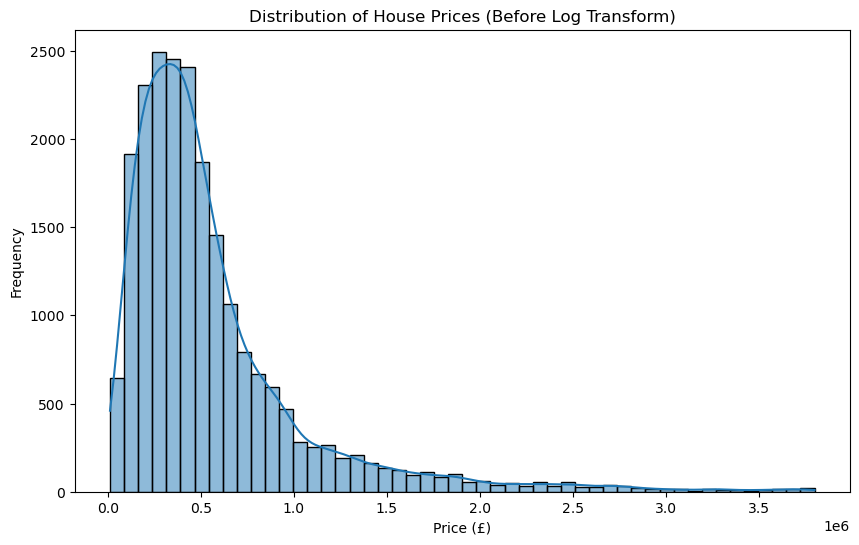

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['latest_price'], bins=50, kde=True)
plt.title('Distribution of House Prices (Before Log Transform)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


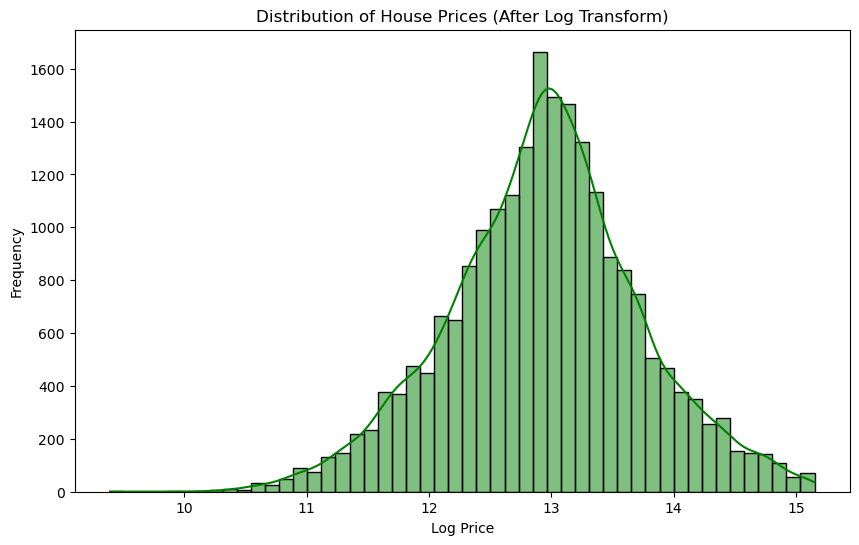

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(df['log_price'], bins=50, kde=True, color='green')
plt.title('Distribution of House Prices (After Log Transform)')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


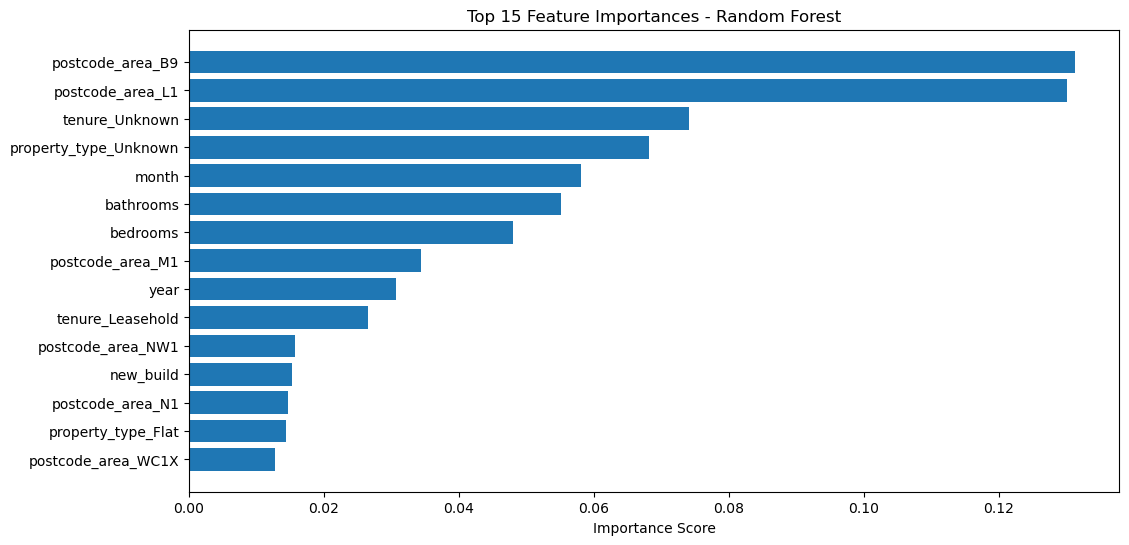

In [91]:
import pandas as pd

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15  # top 15 features

plt.figure(figsize=(12,6))
plt.barh(range(top_n), importances[indices][:top_n], align='center')
plt.yticks(range(top_n), X.columns[indices][:top_n])
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.show()


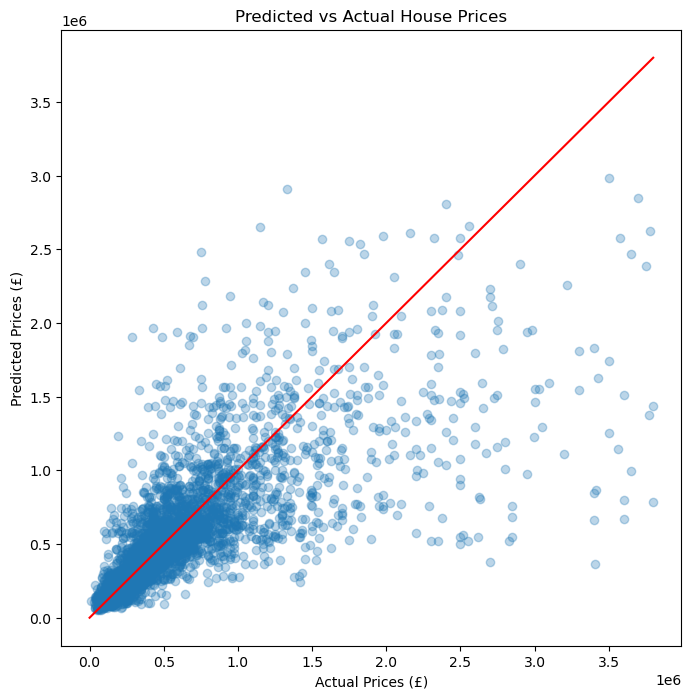

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(y_test_price, y_pred_price, alpha=0.3)
plt.xlabel("Actual Prices (£)")
plt.ylabel("Predicted Prices (£)")
plt.title("Predicted vs Actual House Prices")
plt.plot([0, max(y_test_price)], [0, max(y_test_price)], color='red')
plt.show()


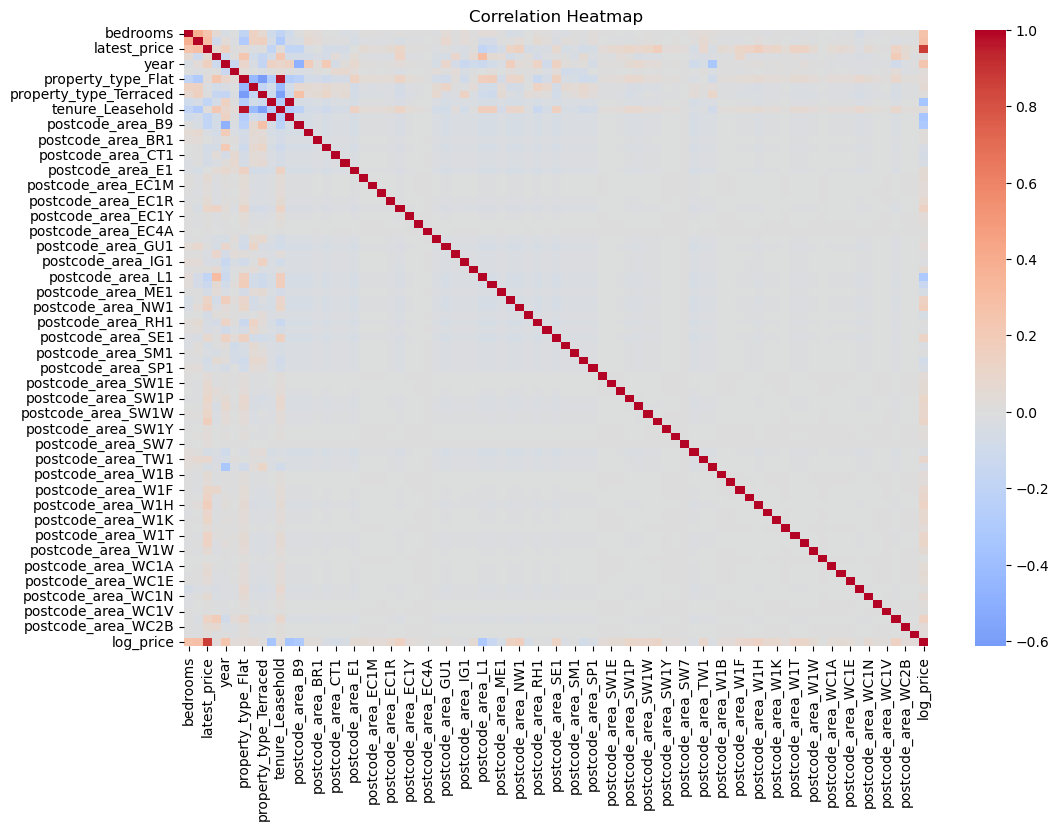

In [93]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [94]:
!pip install lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.5 MB/s  0:00:00


In [106]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgbm.fit(X_train, y_train)

lgbm_score = lgbm.score(X_test, y_test)

y_pred_log_lgbm = lgbm.predict(X_test)
y_pred_price_lgbm = np.expm1(y_pred_log_lgbm)
y_test_price_lgbm = np.expm1(y_test)

lgbm_rmse = np.sqrt(mean_squared_error(y_test_price_lgbm, y_pred_price_lgbm))

lgbm_score, lgbm_rmse


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 17459, number of used features: 65
[LightGBM] [Info] Start training from score 12.939032


(0.7545240958962229, np.float64(340182.8732070213))

In [98]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgbm.fit(X_train, y_train)

lgbm_score = lgbm.score(X_test, y_test)

y_pred_log_lgbm = lgbm.predict(X_test)
y_pred_price_lgbm = np.expm1(y_pred_log_lgbm)
y_test_price_lgbm = np.expm1(y_test)

lgbm_rmse = np.sqrt(mean_squared_error(y_test_price_lgbm, y_pred_price_lgbm))

lgbm_score, lgbm_rmse


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 17459, number of used features: 65
[LightGBM] [Info] Start training from score 12.939032


(0.7545240958962229, np.float64(340182.8732070213))

In [107]:
def predict_price(bedrooms, bathrooms, property_type, tenure, postcode_area, new_build, year, month):
    input_df = pd.DataFrame([{
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "new_build": new_build,
        "year": year,
        "month": month,
        f"property_type_{property_type}": 1,
        f"tenure_{tenure}": 1,
        f"postcode_area_{postcode_area}": 1
    }])

    for col in X.columns:
        if col not in input_df.columns:
            input_df[col] = 0

    input_df = input_df[X.columns]

    log_pred = lgbm.predict(input_df)[0]
    price = np.expm1(log_pred)

    return round(price, 2)



In [112]:
predict_price(
    bedrooms=3,
    bathrooms=2,
    property_type="Terraced",
    tenure="Freehold",
    postcode_area="E1",
    new_build=0,
    year=2025,
    month=5
)


np.float64(981545.93)

In [113]:
predict_price(3, 1, "Semi-detached", "Freehold", "B9", 0, 2024, 5)


np.float64(192777.27)